In [2]:
import pandas as pd
import numpy as np
import sklearn
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [99]:
def process_type(df):
    col = list(df.columns)
    at_d = {}
    for i in range(len(col)-1):
        at_d[col[i]] = 'bool'
    at_d[col[-1]] = 'category'
    df = df.astype(at_d)
    return df

In [100]:
train_df = pd.read_csv('/content/drive/My Drive/Projects/Healthcare Hackerthon/Training.csv')
train_df = train_df.drop(columns=['Unnamed: 133'])
test_df = pd.read_csv('/content/drive/My Drive/Projects/Healthcare Hackerthon/Testing.csv')
train_df = process_type(train_df)
test_df = process_type(test_df)

In [115]:
train_X = train_df.iloc[:,:-1]
train_y = train_df.iloc[:,-1]
test_X = test_df.iloc[:,:-1]
test_y = test_df.iloc[:,-1]

# EDA

In [26]:
import matplotlib.pyplot as plt

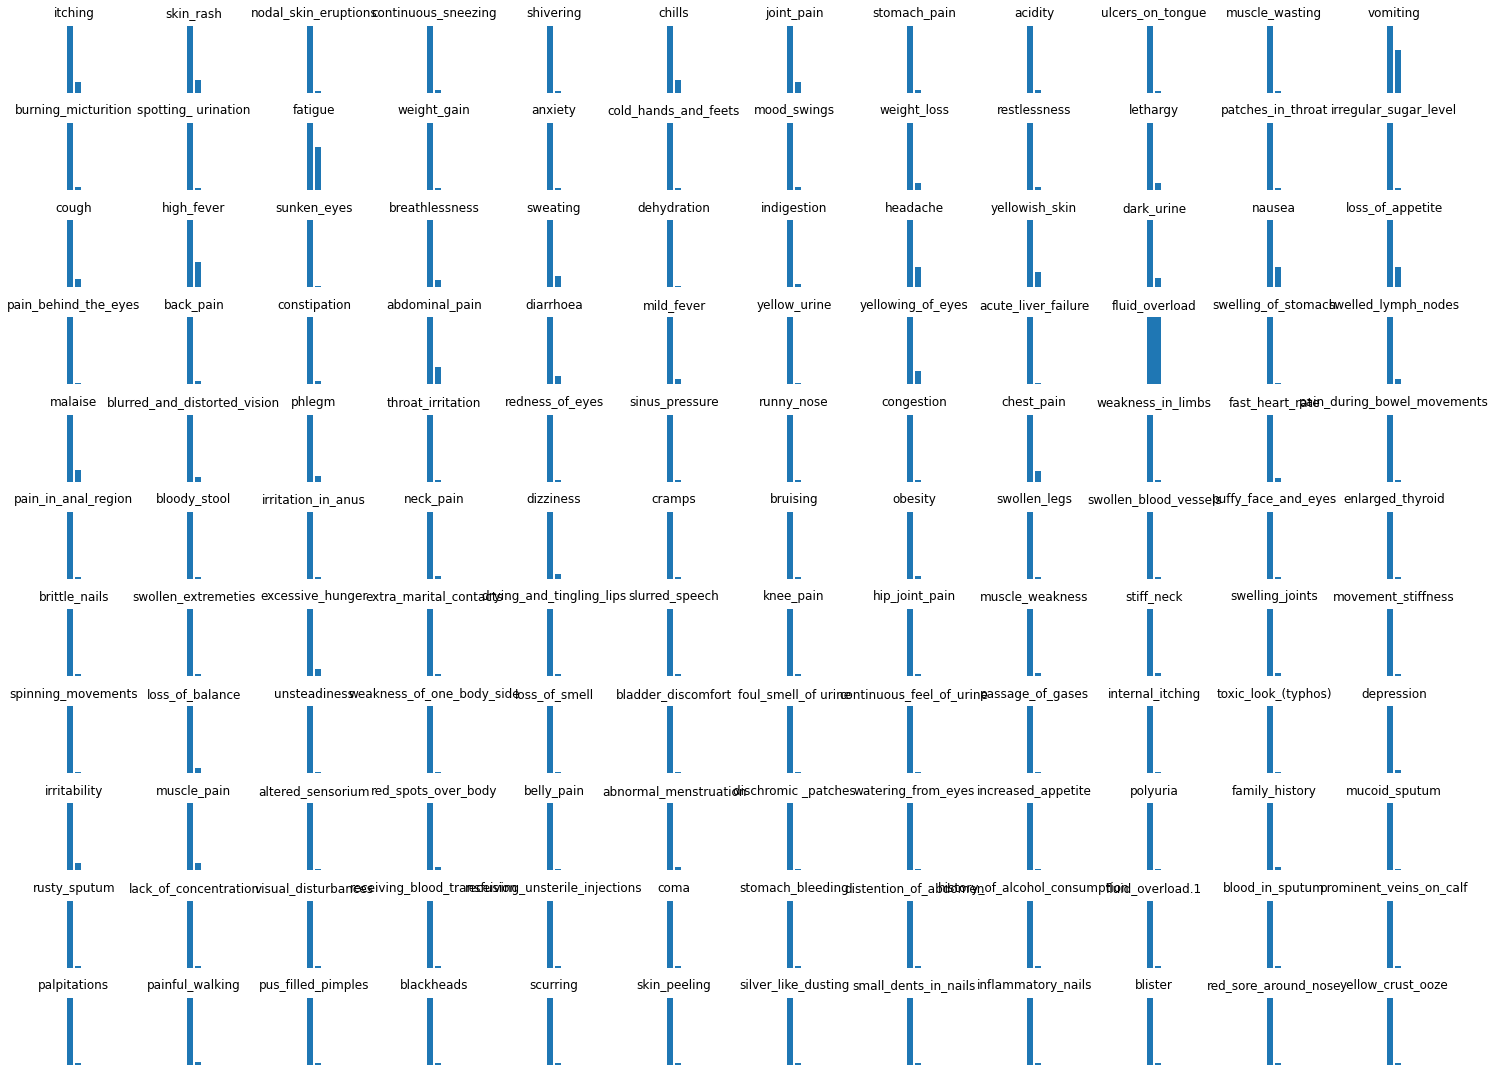

In [71]:
col = list(train_df.columns)
nrow = 11
ncol = 12
fig, ax = plt.subplots(nrow, ncol,figsize=(20,15))
for i in range(len(col)-1):
    a = int(i//ncol)
    b = i%ncol
    axi = ax[a][b]
    col_name = col[i]
    s = train_df.groupby(col_name).size()
    axi.bar(s.index, s.to_list()/s.sum())
    axi.axis('off')
    axi.set_title(col_name)
    # axi.xticks(list(s.index))
plt.tight_layout()
plt.show()

There are 41 classes


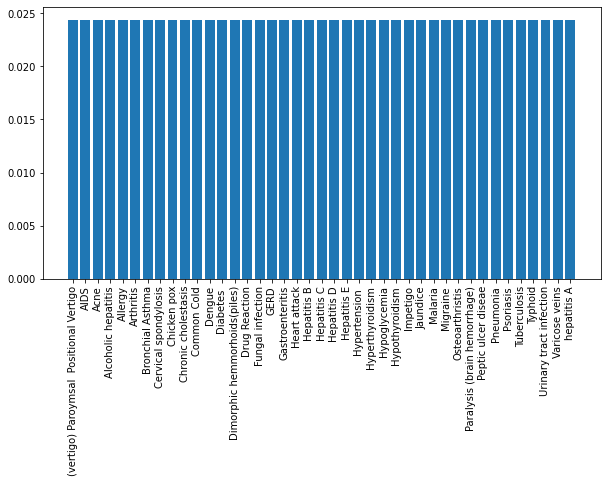

In [91]:
plt.figure(figsize=(10,5))
col_name = col[-1]
s = train_df.groupby(col_name).size()
print(f'There are {len(s)} classes')
plt.bar(s.index, s.to_list()/s.sum())
plt.xticks(rotation=90)
plt.show()

# XGB

In [122]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [163]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [177]:
para = {
    'max_depth':10,
    'n_jobs':-2,
    'objective':'multi:softmax',
    'learning_rate':0.01,
    'subsample':0.7,
    'colsample_bytree':0.7,
    'min_child_weight':0.7,
    # 'nthread':4,
    'n_estimators':50,
}
def get_model_output(train_X, train_y,
            test_X, test_y, para=para):
    model = XGBClassifier(
        max_depth=para['max_depth'],
        learning_rate=para['learning_rate'],
        n_estimators=para['n_estimators'],
        objective=para['objective'],
        colsample_bytree=para['colsample_bytree'],
        subsample=para['subsample'],
        n_jobs=para['n_jobs'],
        min_child_weight=para['min_child_weight'],
    )
    model.fit(train_X, train_y,
            eval_set=[(test_X, test_y)],
            eval_metric='mlogloss',
            verbose=0)
    train_pre_y = model.predict(train_X)
    test_pre_y = model.predict(test_X)

    # print("Feature Importance Plot")
    plt.rcParams["figure.figsize"] = (5,2.5)
    plot_importance(model, max_num_features=10)
    plt.show()
    print()

    print(f"Accuracy\n\tTrain: {accuracy_score(train_y, train_pre_y)*100}% \n\tTest: {accuracy_score(test_y, test_pre_y)*100:.2f}%\n")

    print("Confusion Matrix")
    plt.rcParams["figure.figsize"] = (7,7)
    cm = confusion_matrix(test_y, test_pre_y)
    plot_confusion_matrix(model, test_X, test_y)  
    plt.show()
    print()

    print(classification_report(test_y, test_pre_y))
    print()

    y_preb_probs = model.predict_proba(test_X)
    print(f"ROC AUC Score: {roc_auc_score(test_y, y_preb_probs, average='weighted', multi_class='ovr')}\n")

    print(f"F1 Score: {f1_score(test_y, test_pre_y,average='weighted')}")

    return model

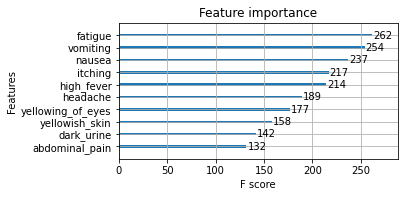


Accuracy
	Train: 100.0% 
	Test: 97.62%

Confusion Matrix


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


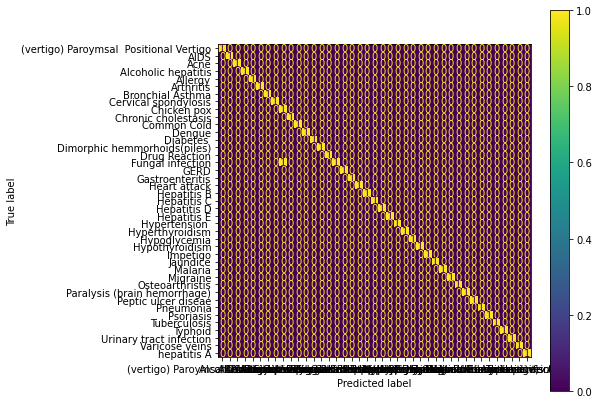


                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                          

XGBClassifier(colsample_bytree=0.7, learning_rate=0.01, max_depth=10,
              min_child_weight=0.7, n_estimators=50, n_jobs=-2,
              objective='multi:softprob', subsample=0.7)

In [178]:
get_model_output(train_X, train_y, test_X, test_y, para)